In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
virus_confirmed =pd.read_csv('C:/Users/karan/OneDrive/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
virus_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,413,414,414,418,418,422,426,428,428,429
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,102,119,120,124,124,125


In [4]:
virus_by_country = virus_confirmed.groupby('Country/Region').sum()

In [5]:
virus_by_country.drop(['Lat','Long'], axis=1,inplace=True)

In [6]:
virus_by_country = virus_by_country.transpose()

In [7]:
virus_by_country.index = pd.to_datetime(virus_by_country.index)

In [30]:
virus_by_country.loc['03/08/2020':].sum(axis=1)

2020-03-08    109795
2020-03-09    113562
2020-03-10    119303
dtype: int64

Text(0.5, 1.0, 'Coronavirus Cases since 10th February 2020')

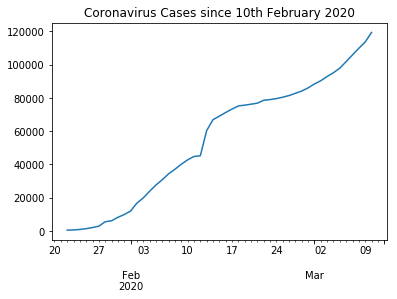

In [38]:
virus_by_country.sum(axis=1).plot()
plt.title('Coronavirus Cases since 10th February 2020')

In [39]:
virus_deaths =pd.read_csv('C:/Users/karan/OneDrive/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [40]:
virus_recovered = pd.read_csv('C:/Users/karan/OneDrive/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [41]:
virus_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [42]:
virus_deaths = virus_deaths.groupby('Country/Region').sum()

In [44]:
virus_deaths = virus_deaths.transpose()

In [47]:
virus_recovered = virus_recovered.groupby('Country/Region').sum()

In [48]:
virus_recovered = virus_recovered.transpose()

In [52]:
virus_deaths.drop(['Lat','Long'], axis=0,inplace=True)

In [55]:
virus_recovered.drop(['Lat','Long'], axis=0,inplace=True)

In [56]:
virus_deaths.index = pd.to_datetime(virus_deaths.index)

In [57]:
virus_recovered.index=pd.to_datetime(virus_recovered.index)

In [62]:
active_cases = virus_by_country.iloc[-1].sum() - virus_deaths.iloc[-1].sum() - virus_recovered.iloc[-1].sum()

In [64]:
virus_by_country.iloc[-1].sum(axis=1).nlargst(5) - virus_deaths.iloc[-1].sum() - virus_recovered.iloc[-1].sum()

45299.0

In [75]:
active_cases = virus_by_country - virus_deaths - virus_recovered

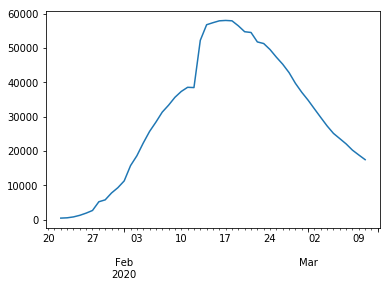

In [81]:
active_cases['Mainland China'].plot()

In [98]:
active_cases.iloc[-1].nlargest(5)

Country/Region
Mainland China                17515.0
Italy                          8794.0
Republic of Korea              7212.0
Iran (Islamic Republic of)     5020.0
France                         1739.0
Name: 2020-03-10 00:00:00, dtype: float64

In [96]:
virus_by_country.iloc[-1].nlargest(5)

Country/Region
Mainland China                80757
Italy                         10149
Iran (Islamic Republic of)     8042
Republic of Korea              7513
France                         1784
Name: 2020-03-10 00:00:00, dtype: int64

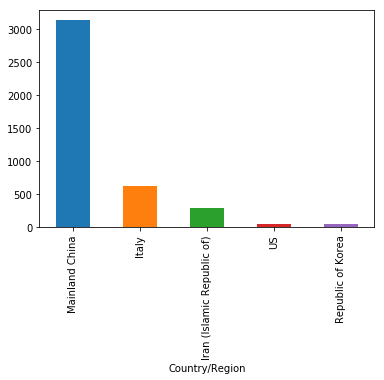

In [102]:
virus_deaths.iloc[-1].nlargest(5).plot(kind='bar')

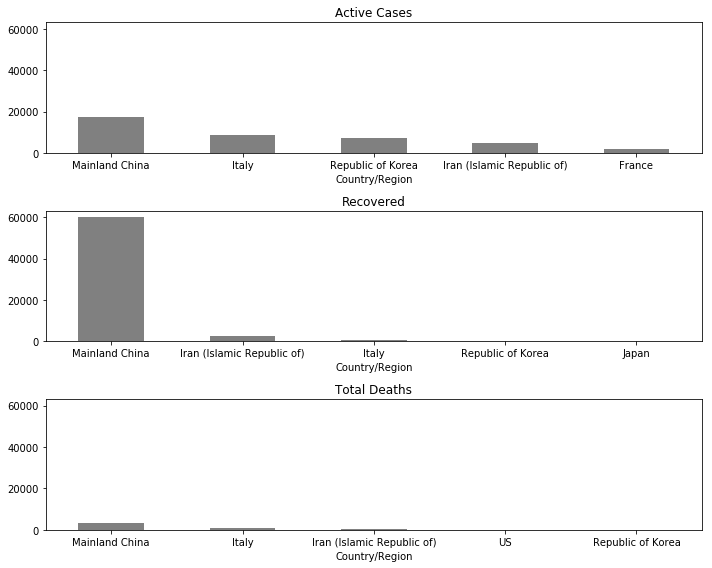

In [156]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,8), sharey=True)
active_cases.iloc[-1].nlargest(5).plot(kind='bar',ax=ax[0], color='grey')
virus_recovered.iloc[-1].nlargest(5).plot(ax=ax[1],kind='bar',color='grey')
virus_deaths.iloc[-1].nlargest(5).plot(ax=ax[2], kind='bar',color='grey')
ax[0].set_title('Active Cases')
ax[1].set_title('Recovered')
ax[2].set_title('Total Deaths')
ax[0].tick_params(labelrotation=0)
ax[1].tick_params(labelrotation=0)
ax[2].tick_params(labelrotation=0)
fig.tight_layout()

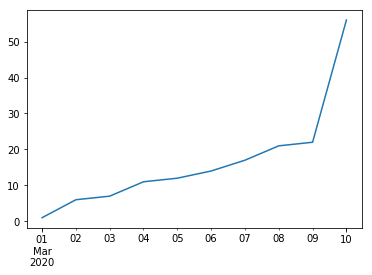

In [145]:
virus_deaths['US'][-10:].plot()

In [177]:
active_cases.sum(axis=1)

2020-01-22      510.0
2020-01-23      605.0
2020-01-24      879.0
2020-01-25     1353.0
2020-01-26     2010.0
2020-01-27     2784.0
2020-01-28     5340.0
2020-01-29     5907.0
2020-01-30     7920.0
2020-01-31     9492.0
2020-02-01    11495.0
2020-02-02    15953.0
2020-02-03    18832.0
2020-02-04    22548.0
2020-02-05    25947.0
2020-02-06    28696.0
2020-02-07    31661.0
2020-02-08    33698.0
2020-02-09    36000.0
2020-02-10    37803.0
2020-02-11    39006.0
2020-02-12    38953.0
2020-02-13    52702.0
2020-02-14    57304.0
2020-02-15    57969.0
2020-02-16    58589.0
2020-02-17    58807.0
2020-02-18    58777.0
2020-02-19    57396.0
2020-02-20    55773.0
2020-02-21    55682.0
2020-02-22    53235.0
2020-02-23    53102.0
2020-02-24    51712.0
2020-02-25    49800.0
2020-02-26    48241.0
2020-02-27    46663.0
2020-02-28    44537.0
2020-02-29    43288.0
2020-03-01    42657.0
2020-03-02    41619.0
2020-03-03    41452.0
2020-03-04    40696.0
2020-03-05    40738.0
2020-03-06    42464.0
2020-03-07

In [176]:
active_cases.loc['2020-02-18'].sum()-active_cases.loc['2020-02-18','Mainland China']

839.0

Text(0.5, 1.0, 'Coronavirus Active Cases')

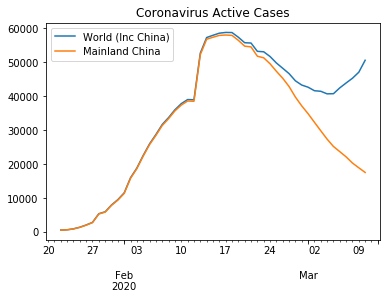

In [185]:
fig, ax = plt.subplots()
active_cases.sum(axis=1).plot()
active_cases['Mainland China'].plot()
ax.legend(['World (Inc China)','Mainland China'])
ax.set_title('Coronavirus Active Cases')

In [186]:
active_cases_ex_china = active_cases.drop(['Mainland China'],axis=1)

Text(0.5, 1.0, 'Active Cases (exc China)')

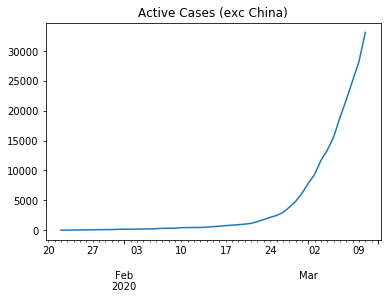

In [190]:
active_cases_ex_china.sum(axis=1).plot()
plt.title('Active Cases (exc China)')

In [201]:
top_active_cases = active_cases_ex_china.iloc[-1].nlargest(10)

In [205]:
list(top_active_cases.to_dict().keys())

['Italy',
 'Republic of Korea',
 'Iran (Islamic Republic of)',
 'France',
 'Spain',
 'US',
 'Germany',
 'Others',
 'Switzerland',
 'Japan']

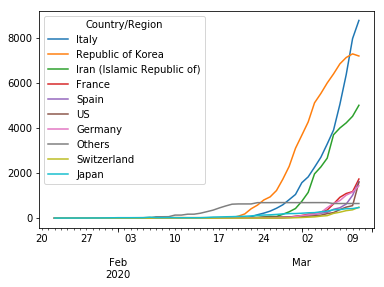

In [206]:
active_cases_ex_china[list(top_active_cases.to_dict().keys())].plot()

Text(0.5, 1.0, 'Australia Active Cases')

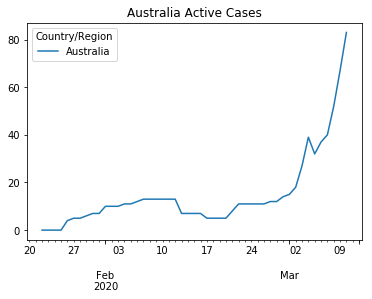

In [224]:
active_cases_ex_china[['Australia']].plot()
plt.title('Australia Active Cases')

Text(0.5, 1.0, 'Total Deaths')

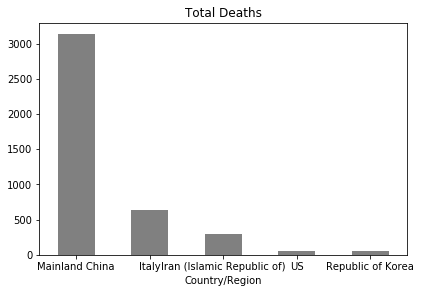

In [229]:
virus_deaths.iloc[-1].nlargest(5).plot(kind='bar',color='grey')
plt.tick_params(rotation=0)
plt.tight_layout()
plt.title('Total Deaths')

Text(0.5, 1.0, 'Active Cases in Countries with Highest Death Toll (exc China)')

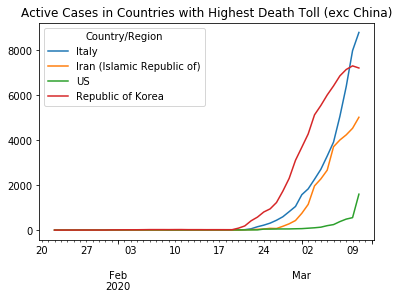

In [233]:
active_cases[['Italy', 'Iran (Islamic Republic of)', 'US', 'Republic of Korea']].plot()
plt.title('Active Cases in Countries with Highest Death Toll (exc China)')

Text(0.5, 1.0, 'Total Deaths')

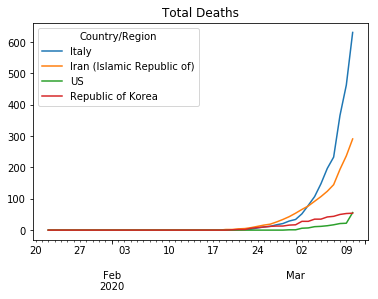

In [237]:
virus_deaths[['Italy', 'Iran (Islamic Republic of)', 'US', 'Republic of Korea']].plot()
plt.title('Total Deaths')

Text(0.5, 1.0, 'Active Cases in US')

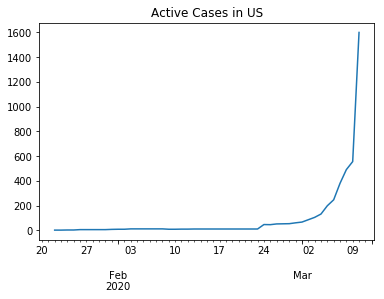

In [239]:
active_cases['US'].plot()
plt.title('Active Cases in US')